In [1]:
import pandas as pd

In [2]:
# Import data
data_url = 'https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_FY2023_Q3.xlsx'
df = pd.read_excel(data_url)

In [3]:
# Add extra data
df['DECISION_TIME'] = df['DECISION_DATE'] - df['RECEIVED_DATE']

In [4]:
# Filter the appeal case, assuming that the audit case is the case that has a decision time of more than 365 days
days_audit = 513
df_audit = df[df['DECISION_TIME'] > pd.Timedelta(days=days_audit)]
df_audit = df_audit[df_audit['DECISION_TIME'] < pd.Timedelta(days=1000)]
df_audit = df_audit[~df_audit['CASE_STATUS'].isin(['Certified-Expired', 'Withdrawn'])]
df_audit

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,DECISION_TIME
692,A-21025-45354,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
693,A-21025-45403,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
1480,A-21106-75277,Denied,2021-05-04,2022-10-05,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,Y,N,Faraz Qaisrani,Associate Attorney,GoogleDOL@balglobal.com,Victoria Cheng,Global Mobility Immigration,519 days
2723,A-21070-60921,Denied,2021-05-06,2022-10-07,N,NaT,NaN,N,DTCP USA LLC,2735 Sand Hill Road,...,N,N,Y,N,Hilla R NATTIV,Attorney,nattiv@bayareaimmigration.com,Jack YOUNG,Head of Ventures,519 days
2759,A-21126-83145,Denied,2021-05-10,2022-10-07,N,NaT,NaN,N,NATIONAL RAILROAD PASSENGER CORPORATION AMTRAK,"1 MASSACHUSETTS, AVE., NW",...,N,N,Y,N,Kane Vongsavanh,Associate,kvongsavanh@balglobal.com,Denyse NelsonBurney,VP People Solutions Delivery,515 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86014,A-21362-91379,Certified,2021-12-20,2023-06-30,N,NaT,NaN,N,HANNLEB LLC,9309 HIGHTOWER OAK STREET,...,N,N,Y,N,LAURA A EDGERTON,ATTORNEY,LEDGERTON@EDGERTONIMMIGRATION.COM,TARVER H PRICE,DIRECTOR OF OPERATIONS,557 days
86022,A-21335-79817,Certified,2021-12-23,2023-06-30,N,NaT,NaN,N,ZUBER LAWLER LLP,350 S. GRAND AVENUE,...,N,N,Y,N,alessandra piras,attorney,apiras@cinottigalgano.com,TIA PORTER,HR MANAGER,554 days
86138,A-21143-90728,Certified,2021-09-02,2023-06-30,N,NaT,NaN,N,MEILBERT DE VERA LOPEZ DBA NORTHERN CONSTRUCTION,"586 MARINE CORPS DRIVE, UNIT 202",...,N,N,Y,N,Melinda S Swavely,Lawyer,swavely@guamlawoffice.com,Meilbert D Lopez,Owner,666 days
86149,A-21320-74055,Certified,2021-12-20,2023-06-30,N,NaT,NaN,N,FE AIRCRAFT MAINTENANCE MIAMI LLC.,657 SOUTH DRIVE,...,Y,N,Y,N,George P Mann,Attorney,Legal@greencard-us.com,Elizabeth Amador,Human Resources Director,557 days


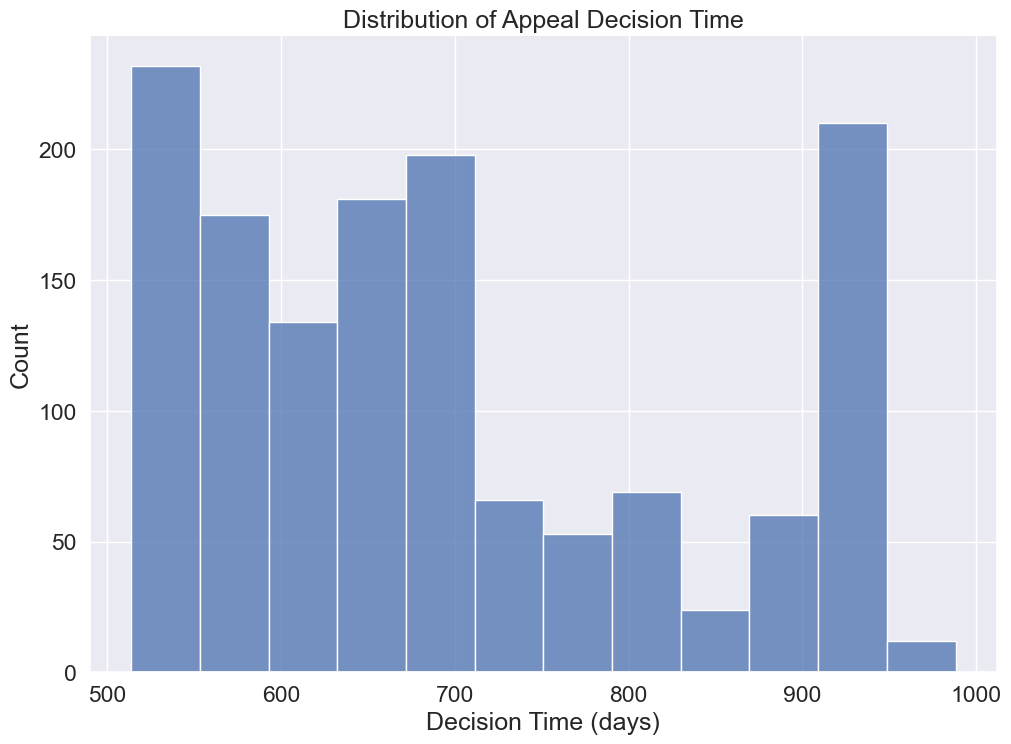

In [5]:
# Visualise the histogram distribution audt decision time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
ax = sns.histplot(x=df_audit['DECISION_TIME'].dt.days)
ax.set(xlabel='Decision Time (days)', title='Distribution of Appeal Decision Time')
plt.show()

In [6]:
df_audit[['CASE_STATUS', 'DECISION_TIME']].groupby('CASE_STATUS').describe()

DECISION_TIME                               \
                    count                         mean   
CASE_STATUS                                              
Certified             813  735 days 16:38:58.007380072   
Denied                601  644 days 03:54:48.519134776   

                                                             \
                                     std                min   
CASE_STATUS                                                   
Certified    144 days 07:54:58.667691648  514 days 00:00:00   
Denied       104 days 16:02:08.879058748  515 days 00:00:00   

                                                                      \
                           25%                50%                75%   
CASE_STATUS                                                            
Certified    618 days 00:00:00  689 days 00:00:00  906 days 00:00:00   
Denied       552 days 00:00:00  626 days 00:00:00  686 days 00:00:00   

                                
                           max  
CASE_STATUS                     
Certified    983 days 00:00:00  
Denied       988 days 00:00:00

In [9]:
res = df_audit[['CASE_STATUS', 'DECISION_TIME']].groupby('CASE_STATUS').describe()['DECISION_TIME']['count']
#get approval rate
approval_rate = res['Certified'] / (res['Certified'] + res['Denied'])
print(f'Approval rate {approval_rate:.2%}')


Approval rate 57.50%
